In [1]:
# Load of necessary libraries
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
# to make the example replicable
np.random.seed(42)
# Load of the dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

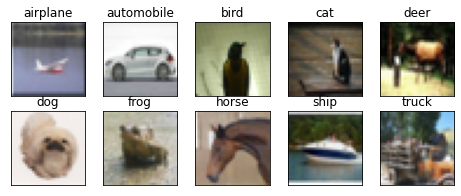

In [3]:
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(Y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    plt.imshow(im)
plt.show()

In [4]:
# Initializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# We add our classificator
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
            optimizer=Adam(lr=0.0001, decay=1e-6),
            metrics=['accuracy'])
# Training of the model
model.fit(X_train, to_categorical(Y_train),
            batch_size=64,
            shuffle=True,
            epochs=5,
            validation_data=(X_test, to_categorical(Y_test)))
# Evaluation of the model
scores = model.evaluate(X_test, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

2022-03-10 03:27:20.399633: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
782/782 [==============================] - 2566s 3s/step - loss: 3.9178 - accuracy: 0.5026 - val_loss: 1.1003 - val_accuracy: 0.6160
Epoch 2/5
782/782 [==============================] - 2209s 3s/step - loss: 0.7910 - accuracy: 0.7316 - val_loss: 1.1244 - val_accuracy: 0.6230
Epoch 3/5
782/782 [==============================] - 17313s 22s/step - loss: 0.3046 - accuracy: 0.9024 - val_loss: 1.2534 - val_accuracy: 0.6289
Epoch 4/5
782/782 [==============================] - 9011s 12s/step - loss: 0.0970 - accuracy: 0.9717 - val_loss: 1.4827 - val_accuracy: 0.6403
Epoch 5/5
313/313 [==============================] - 102s 325ms/step - loss: 1.6843 - accuracy: 0.6319
Loss: 1.684
Accuracy: 0.632
